## Non-linear Dimension Reduction Methods
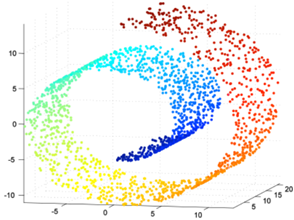
Many machine learning algorithms, for example, struggle with high-dimensional data. This has become known as the curse of dimensionality. Reducing data into fewer dimensions often makes analysis algorithms more efficient, and can help machine learning algorithms make more accurate predictions.

Manifold learning or Nonlinear dimension reduction(NLDR) is a class of unsupervised estimators to describe the datasets as low-dimensional manifolds embedded in high-dimensional spaces.
Manifold learning can be broadly classified into two groups: 
- those that provide a mapping (either from the high-dimensional space to the low-dimensional embedding or vice versa)
- those that just give a visualisation.
 In the context of machine learning, mapping methods may be viewed as a preliminary feature extraction step, after which pattern recognition algorithms are applied. Typically those that just give a visualisation are based on proximity data – that is, distance measurements.

In [2]:
# import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

#### Example of non-linear data in 2d
Generate the scatter plot with points forming up some characters. It has strong non-linearity

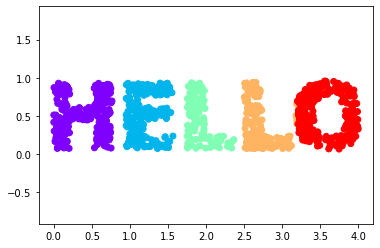

In [4]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');
plt.show()

In [9]:
df = pd.read_csv('../python learning group/data/randomSampleData.csv')
df.head()

,v1,v2,v3,y,v5,v6,v7,v8,v9,v10,...,v19,v20,v21,v22,v23,km,1,2,3,4
0,0.298436,0.481005,0.220558,3,4.166666,0.833333,4.166666,0.000000,0,0,...,0.000000,1.800000,3.999999,0,0.000000,4,0.00,0.00,0.0,1.00
1,0.328286,0.373601,0.298112,4,4.999999,0.000000,4.166666,0.833333,0,0,...,0.000000,2.400000,1.600000,0,4.999999,2,0.00,0.66,0.0,0.34
2,0.065781,0.475161,0.459058,4,4.999999,0.000000,4.999999,0.000000,0,0,...,3.999999,2.999999,3.199999,0,3.749999,1,0.66,0.34,0.0,0.00
3,0.185908,0.362830,0.451262,4,4.999999,0.000000,4.999999,0.000000,0,0,...,3.999999,2.999999,3.199999,0,3.749999,2,0.00,1.00,0.0,0.00
4,0.285729,0.298534,0.415736,2,4.999999,0.000000,2.500000,1.666666,0,0,...,0.000000,1.800000,3.999999,0,4.999999,2,0.00,1.00,0.0,0.00


In [12]:
n_row, n_col = df.shape
x = df.iloc[:, 5:(n_col-5)]

### t-SNE
The t-SNE algorithm comprises two main stages. 
- First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. 
- Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the *Kullback–Leibler divergence* between the two distributions with respect to the locations of the points in the map. 
Note that whilst the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this should be changed as appropriate.

t-SNE is used for high-level visualization for the result, especially for the output of NN. But t-SNE is unreliable for clustering as t-SNE doen't preserve distances. Even data coming from a single Gaussian can appear to be clustered in t-SNE 
#### Disadvantages
- Computationally expensive compare to PCA
- Limited to 2d/3d embeddings
- Algorithm is stocastic. With different seed, the embedding might be different.

#### Optimizating t-SNE

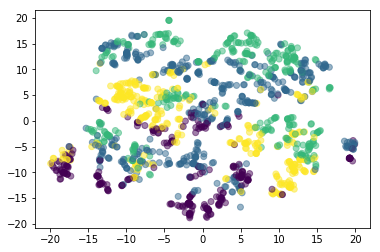

In [9]:
# t-sne
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components = 2).fit_transform(x)
x_km = np.zeros((x_embedded.shape[0], x_embedded.shape[1]+1))
x_km[:,0:2] = x_embedded
x_km[:,2] = df.km
plt.scatter(x_km[:,0], x_km[:,1], c=x_km[:,2], alpha=0.5)
plt.show()

### Isomap

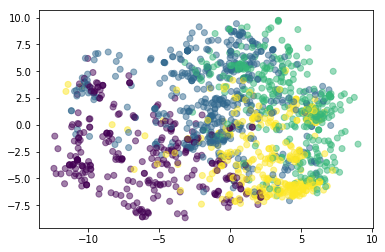

In [10]:
from sklearn.manifold import Isomap
n_neighbors = 10
n_components = 2
x_isomap_embedded = Isomap(n_neighbors, n_components).fit_transform(x)
x_iso = np.zeros((x_isomap_embedded.shape[0], x_isomap_embedded.shape[1]+1))
x_iso[:,0:2] = x_isomap_embedded
x_iso[:,2] = df.km
plt.scatter(x_iso[:,0], x_iso[:,1], c=x_iso[:,2], alpha=0.5)
plt.show()

### PCA
Principle Componenet Analysis (PCA) is a decomposition method and listed here as a comparison. PCA is fast and easily interpretable, but it doesn't perform well when there are non-linear relationships within the data

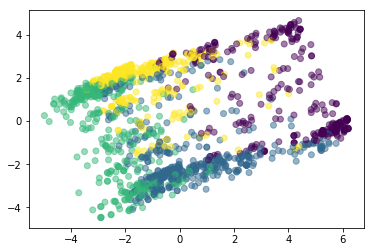

In [94]:
from sklearn.decomposition import PCA
x_pca_fit = PCA(n_components).fit_transform(x)
x_pca = np.zeros((x_pca_fit.shape[0], x_pca_fit.shape[1]+1))
x_pca[:,0:2] = x_pca_fit
x_pca[:,2] = df.km
plt.scatter(x_pca[:,0], x_pca[:,1], c=x_pca[:,2], alpha=0.5)
plt.show()

### MDS
Multi-dimensional scaling

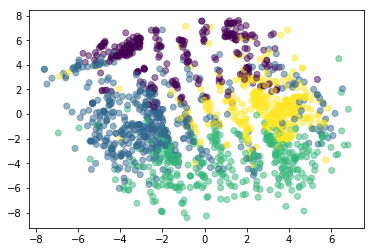

In [96]:
from sklearn.manifold import MDS
n_neighbors = 10
n_components = 2
x_mds_embedded = MDS(n_components).fit_transform(x)
x_mds = np.zeros((x_mds_embedded.shape[0], x_mds_embedded.shape[1]+1))
x_mds[:,0:2] = x_mds_embedded
x_mds[:,2] = df.km
plt.scatter(x_mds[:,0], x_mds[:,1], c=x_mds[:,2], alpha=0.5)
plt.show()

#### Locally Linear Embedding


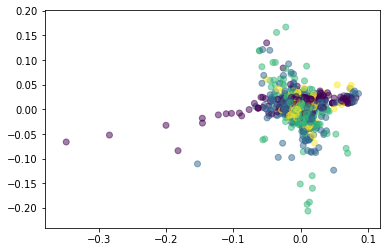

In [115]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
x_lle_embedded = LLE(n_neighbors, n_components).fit_transform(x)
x_lle = np.zeros((x_lle_embedded.shape[0], x_lle_embedded.shape[1]+1))
x_lle[:,0:2] = x_lle_embedded
x_lle[:,2] = df.km
plt.scatter(x_lle[:,0], x_lle[:,1], c=x_lle[:,2], alpha=0.5)
plt.show()